In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [12]:
male_cust = df[df['Gender'] == 'Male']
female_cust = df[df['Gender'] == 'Female']

In [13]:
male_cust['Spending Score (1-100)'].sum()

4269

In [14]:
female_cust['Spending Score (1-100)'].sum()

5771

In [15]:
labels = ['Males', 'Females']
sizes = [male_cust.shape[0], female_cust.shape[0]]
colors = ['#add8e6','#ffb6c1'] 

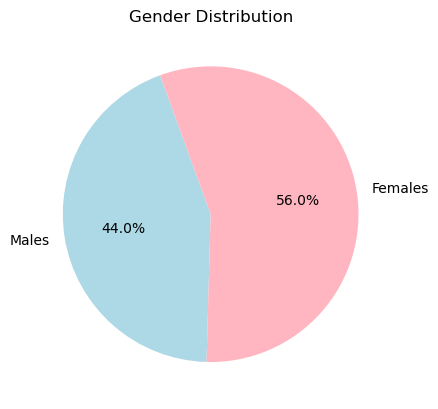

In [16]:
plt.pie(sizes, labels=labels, colors=colors, autopct='%0.1f%%', startangle=110)
plt.title('Gender Distribution')
plt.show()

In [17]:
sel_features = ['Annual Income (k$)', 'Spending Score (1-100)']

In [18]:
X = df[sel_features].values

In [19]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [20]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

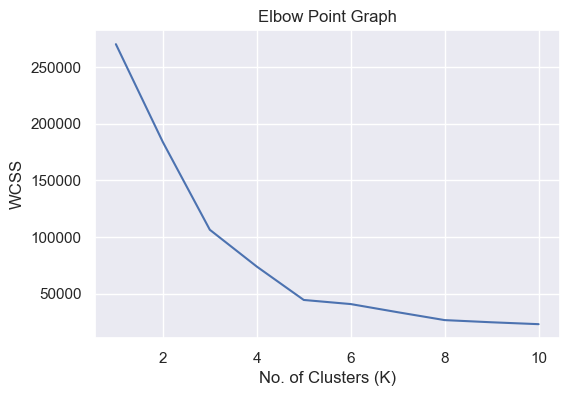

In [21]:
sns.set()

plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('No. of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

Y = kmeans.fit_predict(X)

df['Cluster'] = Y

df.to_csv("Mall_Customers_Clustered.csv", index=False)

In [23]:
clusters = list(set(Y))
print(f"Clusters are = {clusters}")

Clusters are = [0, 1, 2, 3, 4]


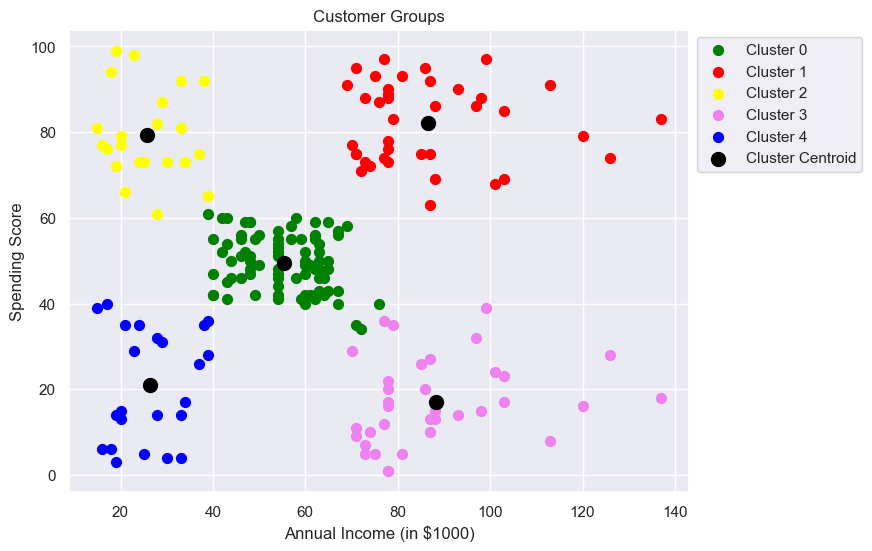

In [24]:

plt.figure(figsize=(8,6))

plt.scatter(X[Y==0, 0], X[Y==0, 1], s=50, c='green', label='Cluster 0')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=50, c='violet', label='Cluster 3')
plt.scatter(X[Y==4, 0], X[Y==4, 1], s=50, c='blue', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Cluster Centroid')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.title('Customer Groups')
plt.xlabel('Annual Income (in $1000)')
plt.ylabel('Spending Score')

plt.show()

In [25]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [26]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
